지도학습
=========

1. 지도학습의 종류: 출력 값에 연속성이 존재하는가? 로 판별 가능.
    1. 분류(classification)
        1. 이진 분류 (binary)
        2. 다중 분류(multiclass)
    2. 회귀(regression)

- 일반화(generalization): 모델이 처음 보는 데이터에 대해 정확하게 예측할 수 있게 되는 것.
- 과대적합 (overfitting): 모델이 훈련 세트의 각 샘플에 너무 가깝게 맞춰져서 새로운 데이터에 일반화되기 어려운 상황

- 과소적합 (underfitting): 너무 간단한 모델이 선택되는 것. 

모델이 복잡해질 수록 훈련 데이터에 대한 예측력이 올라가지만 어느 정도를 넘어가면 과대적합이 일어나 버린다.

주어진 데이터센의 다양성이 높을수록 일반화가 잘 된 모델을 만들수 있다.

지도학습 알고리즘
-------

X.shape: (26, 2)


d:\machine learning study\.venv\for_machine_learning_study\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 52395 (\N{HANGUL SYLLABLE CEOS}) missing from current font.
  func(*args, **kwargs)
d:\machine learning study\.venv\for_machine_learning_study\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 48264 (\N{HANGUL SYLLABLE BEON}) missing from current font.
  func(*args, **kwargs)
d:\machine learning study\.venv\for_machine_learning_study\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 51704 (\N{HANGUL SYLLABLE JJAE}) missing from current font.
  func(*args, **kwargs)
d:\machine learning study\.venv\for_machine_learning_study\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 53945 (\N{HANGUL SYLLABLE TEUG}) missing from current font.
  func(*args, **kwargs)
d:\machine learning study\.venv\for_machine_learning_study\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from cu

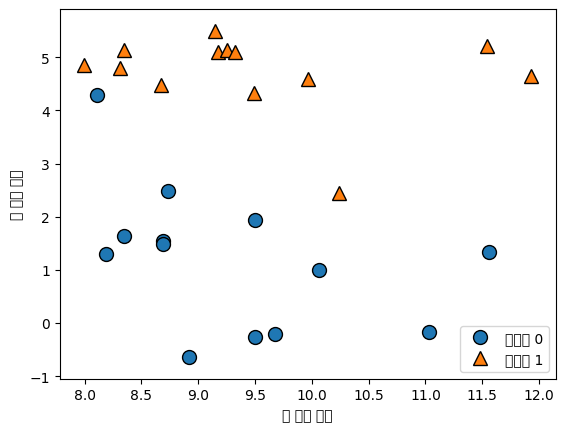

In [4]:
#dataset 만들기
import mglearn
X, y = mglearn.datasets.make_forge()

# 산점도 그리기
%matplotlib inline
import matplotlib.pyplot as plt
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.legend(["클래스 0", "클래스 1"], loc=4)
plt.xlabel("첫 번째 특성")
plt.ylabel("두 번째 특성")
print("X.shape: {}".format(X.shape))
#이런 폰트가 없어서 에러가 나는군.


X.shape: (40, 1)


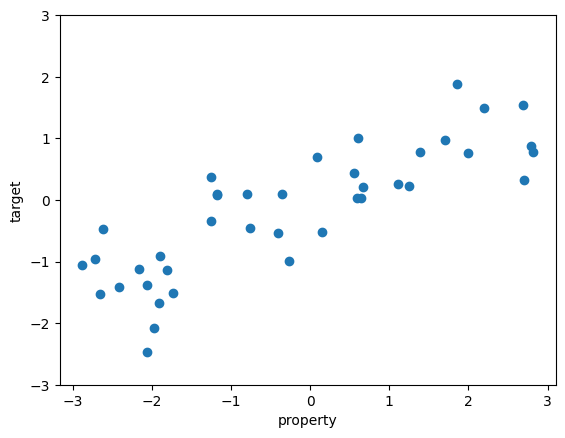

In [5]:
#dataset 만들기
import mglearn
X, y = mglearn.datasets.make_wave(n_samples=40)

# 산점도 그리기
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(X,y, 'o')
plt.ylim(-3,3)
plt.xlabel("property")
plt.ylabel("target")
print("X.shape: {}".format(X.shape))
#이런 폰트가 없어서 에러가 나는군.


In [9]:
#dataset 만들기
from sklearn.datasets import load_breast_cancer
import numpy as np
cancer = load_breast_cancer()
print("cancer.keys(): \n{}".format(cancer.keys()))
print("cancer.data.shape: {}".format(cancer.data.shape))
print("the num of samples for each class:\n{}".format({n:v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))
print("property names:\n{}".format(cancer.feature_names))


cancer.keys(): 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
cancer.data.shape: (569, 30)
the num of samples for each class:
{'malignant': 212, 'benign': 357}
property names:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [10]:
#dataset 만들기
#boston의 집값
from sklearn.datasets import load_boston
import numpy as np
boston = load_boston()
print("boston.keys(): \n{}".format(boston.keys()))
print("boston.data.shape: {}".format(boston.data.shape))

#이 코드는 사용 불가능한 듯?


ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>


In [15]:
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

print(raw_df.shape)

print(target.shape)

(1012, 11)
(506,)


#### k-NN (k nearlest neighbors) algorithm

가장 간단한 머신러닝 알고리즘.

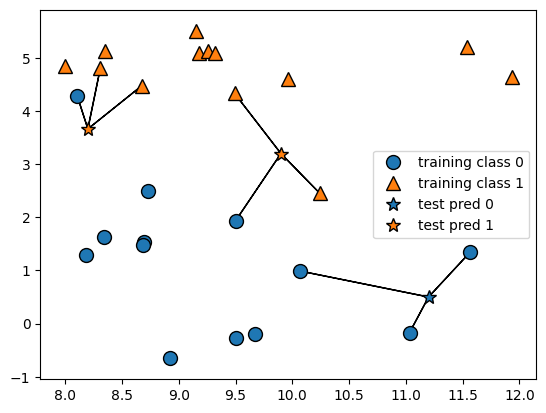

In [17]:
mglearn.plots.plot_knn_classification(n_neighbors=3)
#아마도 내장되어 있는 forge 데이터를 가지고 예시를 보여주는 코드같다.
#순전히 개념 설명용인 듯.